In [1]:
!pip install pandas

In [ ]:
import numpy as np

In [ ]:
selected_column_diabetes = df['% DIABETIC'] 

selected_column_diabetes = pd.to_numeric(selected_column_diabetes, errors='coerce')

selected_column_obesity = df1['% OBESE']

selected_column_obesity = pd.to_numeric(selected_column_obesity, errors='coerce')

selected_column_inactivity = df2['% INACTIVE']

selected_column_inactivity = pd.to_numeric(selected_column_inactivity, errors='coerce')

In [ ]:
from scipy import stats

mean_diabetes = np.mean(selected_column_diabetes)
mean_obesity = np.mean(selected_column_obesity)
mean_inactivity = np.mean(selected_column_inactivity)

median_diabetes = np.nanmedian(selected_column_diabetes)
median_obesity = np.nanmedian(selected_column_obesity)
median_inactivity = np.nanmedian(selected_column_inactivity)

skewness_diabetes = stats.skew(selected_column_diabetes, nan_policy='omit')
skewness_obesity = stats.skew(selected_column_obesity, nan_policy='omit')
skewness_inactivity = stats.skew(selected_column_inactivity, nan_policy='omit')

# Print the results
print("Mean of % Diabetes:", mean_diabetes)
print("Median of % Diabetes:", median_diabetes)
print("Skewness of % Diabetes:", skewness_diabetes)

print("Mean of % Obesity:", mean_obesity)
print("Median of % Obesity:", median_obesity)
print("Skewness of % Obesity:", skewness_obesity)

print("Mean of % Inactivity:", mean_inactivity)
print("Median of % Inactivity:", median_inactivity)
print("Skewness of % Inactivity:", skewness_inactivity)


In [ ]:
# Calculating Standard Deviation of Diabetes,Obesity & Inactivity

In [ ]:
std_diabetes = np.std(selected_column_diabetes)
std_obesity = np.std(selected_column_obesity)
std_inactivity = np.std(selected_column_inactivity)

print("Std of % Diabetes : ",std_diabetes)
print("Std of % Obesity : ",std_obesity)
print("Std of % Inactivity : ",std_inactivity)

In [ ]:
# Calculating kurtosis of Diabetes,Obesity & Inactivity

In [ ]:
from scipy.stats import kurtosis

In [ ]:
def calculate_kurtosis(column):
    # Filter out NaN values from the column
    valid_data = column[~np.isnan(column)]
    
    try:
        kurtosis_value = kurtosis(valid_data)
        return kurtosis_value
    except Exception as e:
        return str(e)

Kurtosis_diabetes = calculate_kurtosis(selected_column_diabetes)
Kurtosis_obesity = calculate_kurtosis(selected_column_obesity)
Kurtosis_inactivity = calculate_kurtosis(selected_column_inactivity)

print("Kurtosis of % Diabetes:", Kurtosis_diabetes)
print("Kurtosis of % Obesity:", Kurtosis_obesity)
print("Kurtosis of % Inactivity:", Kurtosis_inactivity)

In [ ]:
# Creating a new excel sheet 

In [ ]:
Diabetes = pd.read_excel(file_path,  sheet_name='Diabetes')
Obesity = pd.read_excel(file_path, sheet_name='Obesity')
Inactivity = pd.read_excel(file_path, sheet_name='Inactivity')

In [ ]:
add_diabetes_obesity_data = pd.merge(Diabetes, Obesity, on='FIPS', how='inner' )

final_file = pd.merge(add_diabetes_obesity_data, Inactivity, on = 'FIPS', how = 'inner')

final_file.to_excel('final_merged.xlsx', index=False)

In [ ]:
# Above code helped me form a new excel which has 356 data points in it.

In [ ]:
# My next step is to delete the repeated columns in the new file : 'final_merged.xlsx' 

In [ ]:
df = pd.read_excel('D:\\Juice Wrld\\University\\Subjects\\Fall 2023\\MTH 522 - Mathematical Statistics\\final_merged.xlsx')

In [ ]:
columns_to_delete = ['YEAR_y','COUNTY_y','STATE_x','YEAR','COUNTY','STATE_y']

In [ ]:
df = df.drop(columns=columns_to_delete)
df.to_excel('modified_file.xlsx',index=False )

In [ ]:
# Renaming the columns and increasing columns width size 

In [ ]:
state_column = df['State']

In [ ]:
state_counts = state_column.value_counts()

In [ ]:
state_counts_df = pd.DataFrame({'State': state_counts.index, 'Count': state_counts.values})

In [ ]:
state_counts_df.to_excel('state_count.xlsx', index=False)

In [ ]:
pip install openpyxl==3.0.10

In [ ]:
# linear regression model analysis 

# Model A : Independent variables : Diabetes & Obesity , Dependent variable : Inactivity
# Model B : Independent variables : Obesity & Inactivity , Dependent variable : Diabetes
# Model C : Independent variables : Inactivity & Diabetes , Dependent variable : Obesity

In [ ]:
# Model A : Independent variables : Diabetes & Obesity , Dependent variable : Inactivity

In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.api import add_constant, OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data from an Excel file (replace 'your_file.xlsx' with your actual file name)
file_path = 'D:\\Juice Wrld\\University\\Subjects\\Fall 2023\\MTH 522 - Mathematical Statistics\\your_modified_file.xlsx'
df = pd.read_excel(file_path)

# Remove rows with missing values in the dependent variable (% Inactivity)
df_cleaned = df.dropna(subset=['% Inactivity'])

# Define the independent variables (% Diabetes and % Obesity) and the dependent variable (% Inactivity) from the cleaned DataFrame
X = df_cleaned[['% Diabetes', '% Obesity']]
y = df_cleaned['% Inactivity']

# Calculate VIF for each independent variable
X_with_const = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("VIF values:")
print(vif)

# Create a linear regression model using scikit-learn
model = LinearRegression()

# Perform K-fold cross-validation
k = 5  # You can adjust the number of folds (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X, y, cv=k, scoring='r2')

# Print the R-squared values for each fold
print("R-squared values for each fold:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

# Fit the model to the entire dataset
model.fit(X, y)

# Print the intercept and coefficien
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the actual vs. predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual % Inactivity Y")
plt.ylabel("Predicted % Inactivity")
plt.title("Actual % Inactivity vs. Predicted % Inactivity")

# Calculate the regression line
regression_line = model.predict(X)

# Add the regression line to the plot
plt.plot(y_pred, regression_line, color='red', linestyle='--', label='Regression Line')

# Display the legend
plt.legend()

# Add a constant term to the independent variables for statsmodels
X = add_constant(X)

# Fit the linear regression model using statsmodels
model = OLS(y, X).fit

# Get the confidence intervals for coefficients
confidence_intervals = model.conf_int()
p_values = model.summary()

# Print the confidence intervals for each coefficient
print("Confidence Intervals for coefficients:")
print(confidence_intervals)
print(p_values)

plt.show()


In [ ]:
# Model B : Independent variables : Obesity & Inactivity , Dependent variable : Diabetes

VIF values:
       Variable         VIF
0         const  318.054491
1  % Inactivity    1.287670
2     % Obesity    1.287670
R-squared values for each fold: [ 0.46174692  0.02028448 -0.05981153 -0.05914246  0.41097258]
Mean R-squared: 0.1548099964274585
Intercept: 1.6535991518559428
Coefficients: [0.23246992 0.11106297]
Confidence Intervals for coefficients:
                     0         1
const         0.547856  2.759343
% Inactivity  0.186854  0.278086
% Obesity     0.042624  0.179501
                            OLS Regression Results                            
Dep. Variable:             % Diabetes   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     90.71
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.76e-32
Time:                        10:28:50   Log-Likelihood:                -315.89
No. Observations:                 

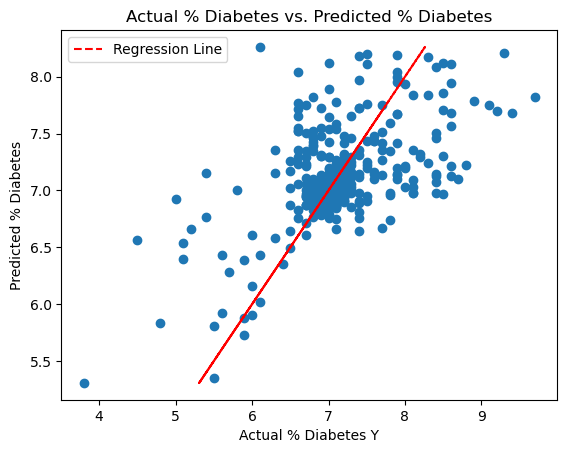

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.api import add_constant, OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_cleaned = df.dropna(subset=['% Inactivity'])
[['% Inactivity', '% Obesity']]
y = df_cleaned['% Diabetes']
X_with_const = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("VIF values:")
print(vif)
model = LinearRegression()
k = 5  # You can adjust the number of folds (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X, y, cv=k, scoring='r2')
print("R-squared values for each fold:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.xlabel("Actual % Diabetes Y")
plt.ylabel("Predicted % Diabetes")
plt.title("Actual % Diabetes vs. Predicted % Diabetes")
regression_line = model.predict(X)
plt.plot(y_pred, regression_line, color='red', linestyle='--', label='Regression Line')
plt.legend()
X = add_constant(X)
model = OLS(y, X).fit()
confidence_intervals = model.conf_int()
p_values = model.summary()
print("Confidence Intervals for coefficients:")
print(confidence_intervals)
print(p_values)
plt.show()

In [ ]:
# Model C : Independent variables : Inactivity & Diabetes , Dependent variable : Obesity

VIF values:
       Variable         VIF
0         const  120.667023
1  % Inactivity    1.474071
2    % Diabetes    1.474071
R-squared values for each fold: [ 0.2519533  -0.1294807   0.07745399  0.01265881  0.25160269]
Mean R-squared: 0.09283761590837916
Intercept: 12.794020997778297
Coefficients: [0.24712076 0.25394098]
Confidence Intervals for coefficients:
                      0          1
const         11.764158  13.823884
% Inactivity   0.173320   0.320921
% Diabetes     0.097459   0.410423
                            OLS Regression Results                            
Dep. Variable:              % Obesity   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     57.04
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.54e-22
Time:                        10:15:53   Log-Likelihood:                -462.27
No. Observations:        

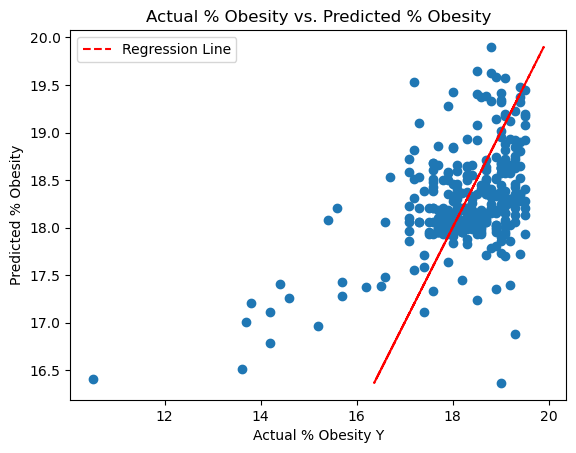

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.api import add_constant, OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data from an Excel file (replace 'your_file.xlsx' with your actual file name)
file_path = 'D:\\Juice Wrld\\University\\Subjects\\Fall 2023 - MTH 522 - Mathematical Statistics\\your_modified_file.xlsx'
df = pd.read_excel(file_path)

# Remove rows with missing values in the dependent variable (% Inactivity)
df_cleaned = df.dropna(subset=['% Inactivity'])

# Define the independent variables (% Diabetes and % Obesity) and the dependent variable (% Inactivity) from the cleaned DataFrame
X = df_cleaned[['% Inactivity', '% Diabetes']]
y = df_cleaned['% Obesity']

# Calculate VIF for each independent variable
X_with_const = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("VIF values:")
print(vif)

# Create a linear regression model using scikit-learn
model = LinearRegression()

# Perform K-fold cross-validation
k = 5  # You can adjust the number of folds (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X, y, cv=k, scoring='r2')

# Print the R-squared values for each fold
print("R-squared values for each fold:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

# Fit the model to the entire dataset
model.fit(X, y)

# Print the intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the actual vs. predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual % Obesity Y")
plt.ylabel("Predicted % Obesity")
plt.title("Actual % Obesity vs. Predicted % Obesity")

# Calculate the regression line
regression_line = model.predict(X)

# Add the regression line to the plot
plt.plot(y_pred, regression_line, color='red', linestyle='--', label='Regression Line')

# Display the legend
plt.legend()

# Add a constant term to the independent variables for statsmodels
X = add_constant(X)

# Fit the linear regression model using statsmodels
model = OLS(y, X).fit()

# Get the confidence intervals for coefficients
confidence_intervals = model.conf_int()
p_values = model.summary()

# Print the confidence intervals for each coefficient
print("Confidence Intervals for coefficients:")
print(confidence_intervals)
print(p_values)

plt.show()


# Final Analysis of Linear Regression Model Let's compare the three models (A, B, and C) based on various statistics and provide a detailed analysis:

Model A:

VIF values:
const: 325.88
% Diabetes: 1.18
% Obesity: 1.18
Mean R-squared: 0.125
Intercept: -0.158
Coefficients for % Diabetes and % Obesity: 0.957 and 0.445, respectively
Confidence Intervals for coefficients (95%):
% Diabetes: [0.769, 1.145]
% Obesity: [0.312, 0.578]
F-statistic: 115.2
Prob (F-statistic): 3.51e-39
Model B:

VIF values:
const: 318.05
% Inactivity: 1.29
% Obesity: 1.29
Mean R-squared: 0.155
Intercept: 1.654
Coefficients for % Inactivity and % Obesity: 0.232 and 0.111, respectively
Confidence Intervals for coefficients (95%):
% Inactivity: [0.187, 0.278]
% Obesity: [0.043, 0.180]
F-statistic: 90.71
Prob (F-statistic): 1.76e-32
Model C:

VIF values:
const: 120.67
% Inactivity: 1.47
% Diabetes: 1.47
Mean R-squared: 0.093
Intercept: 12.794
Coefficients for % Inactivity and % Diabetes: 0.247 and 0.254, respectively
Confidence Intervals for coefficients (95%):
% Inactivity: [0.173, 0.321]
% Diabetes: [0.097, 0.410]
F-statistic: 57.04
Prob (F-statistic): 3.54e-22
Analysis and Comparison:

VIF Values:

Model A has a very high VIF value for the constant (const), indicating potential multicollinearity with other variables in the model.
Model B and Model C also have high VIF values for the constant but lower than in Model A. These models include different sets of independent variables.
R-squared:

Model B has the highest mean R-squared (0.155), indicating that it explains the most variation in the dependent variable (% Inactivity).
Model A has the lowest mean R-squared (0.125).
Model C falls in between with a mean R-squared of 0.093.
Intercept and Coefficients:

The intercept values differ significantly between models. For Model A, it's close to zero, while for Models B and C, it's considerably higher.
The coefficients also vary between models, and their interpretations depend on the specific variables used in each model.
Confidence Intervals:

Confidence intervals for coefficients indicate whether they are statistically significant. In all models, some coefficients have confidence intervals that exclude zero, making them statistically significant predictors.
F-statistic:

Model A has the highest F-statistic (115.2), indicating strong overall model significance.
Model B has a lower F-statistic (90.71), but it is still highly significant.
Model C has the lowest F-statistic (57.04), which is also statistically significant but relatively lower than the other models.
Multicollinearity:

All three models exhibit multicollinearity to some extent, with high VIF values for the constant term in each case.
Model B and Model C include % Inactivity as an independent variable, which may contribute to multicollinearity in these models.
Relationships:

Model B appears to perform the best in terms of R-squared and overall model significance.
Model A has a particularly high VIF value for the constant, which indicates a potential issue with multicollinearity.
Model C has a moderate R-squared and F-statistic but also includes % Inactivity as an independent variable